# Example for PostProcessData

This file shows how the PostProcessData results would ideally look like

## Imports
Importing the PostProessData and relevant packages to plot the processed data

In [1]:
from firepydaq.utilities.PostProcessing import PostProcessData

import numpy as np
import matplotlib.pyplot as plt

def plot_collected(PPData):
	
	for _,chart_df in PPData.All_chart_info.group_by(["Chart"]):
		if not chart_df.select("Label")[0].item() in PPData.df_processed.columns:
			continue
		_,axes = plt.subplots(chart_df.select("Layout")[0].item())
		if not isinstance(axes,np.ndarray): # If it is only a single axis
			axes = [axes]
		for row in chart_df.iter_rows(named=True):
			try:
				axes[row["Position"]-1].plot(PPData.df_processed.select("Time"),PPData.df_processed.select(row["Label"]),label=row["Legend"])
				axes[row["Position"]-1].set_xlabel("Time (s)")
				axes[row["Position"]-1].set_ylabel(row["Chart"]+" ( "+row["Processed_Unit"]+" )")
				axes[row["Position"]-1].legend()
			except:
				the_type, the_value, _ = sys.exc_info()
				print(the_type, ': ', the_value)

	plt.show()
	return

ModuleNotFoundError: No module named 'firepydaq'

## Collecting and post processing data  
Based on the data, config file, and a formulae file in `tests`



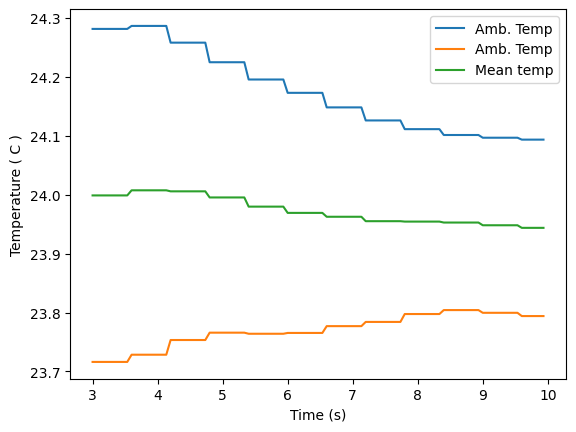

In [2]:
datapath = '../tests/Example_ExpData/20240724_1045_Anvii_Project1_Test1.parquet'
configpath = '../tests/Example_Config_Formulae/20240329_1354_Testing.csv'
formulaepath = "../tests/Example_Config_Formulae/Processing_formulaeTesting.csv"

PPData = PostProcessData(datapath = datapath, configpath = configpath, formulaepath = formulaepath)
PPData.ScaleData()
PPData.UpdateData(dump_output = False)
plot_collected(PPData)
